## Salaries for Professors

[R documentation](http://finzi.psych.upenn.edu/R/library/car/html/Salaries.html)

In [1]:
#Pkg.add("DataFramesMeta")
#Pkg.add("RDatasets")
#Pkg.add("Gadfly")
using DataFramesMeta
using Gadfly
using KernelDensity
using RDatasets

## Exploring contents of RDatasets package

In [42]:
RDatasets.packages()

33×2 DataFrames.DataFrame
│ Row │ Package        │
├─────┼────────────────┤
│ 1   │ "COUNT"        │
│ 2   │ "Ecdat"        │
│ 3   │ "HSAUR"        │
│ 4   │ "HistData"     │
│ 5   │ "ISLR"         │
│ 6   │ "KMsurv"       │
│ 7   │ "MASS"         │
│ 8   │ "SASmixed"     │
│ 9   │ "Zelig"        │
│ 10  │ "adehabitatLT" │
│ 11  │ "boot"         │
⋮
│ 22  │ "plm"          │
│ 23  │ "plyr"         │
│ 24  │ "pscl"         │
│ 25  │ "psych"        │
│ 26  │ "quantreg"     │
│ 27  │ "reshape2"     │
│ 28  │ "robustbase"   │
│ 29  │ "rpart"        │
│ 30  │ "sandwich"     │
│ 31  │ "sem"          │
│ 32  │ "survival"     │
│ 33  │ "vcd"          │

│ Row │ Title                                                                     │
├─────┼───────────────────────────────────────────────────────────────────────────┤
│ 1   │ "Functions, data and code for count data."                                │
│ 2   │ "Data sets for econometrics"                                              │
│ 3   │ "A Handbook of Statistical Analyses Using R (1st Edition)"                │
│ 4   │ "Data sets from the history of statistics and data visualization"         │
│ 5   │ "Data for An Introduction to Statistical Learning with Applications in R" │
│ 6   │ "Data sets from Klein and Moeschberger (1997), Survival Analysis"         │
│ 7   │ "Support Functions and Datasets for Venables and Ripley's MASS"           │
│ 8   │ "Data sets from \"SAS System for Mixed Models\""                            │
│ 9   │ "Everyone's Statistical Software"                                         │
│ 10  │ "Analysis of Animal Movements"                                            │
│ 11  │ "Bootstrap Functions (Originally by Angelo Canty for S)"                  │
⋮
│ 22  │ "Linear Models for Panel Data"                                            │
│ 23  │ "Tools for splitting, applying and combining data"                        │
│ 24  │ "Political Science Computational Laboratory, Stanford University"         │
│ 25  │ "Procedures for Psychological, Psychometric, and Personality Research"    │
│ 26  │ "Quantile Regression"                                                     │
│ 27  │ "Flexibly Reshape Data: A Reboot of the Reshape Package."                 │
│ 28  │ "Basic Robust Statistics"                                                 │
│ 29  │ "Recursive Partitioning and Regression Trees"                             │
│ 30  │ "Robust Covariance Matrix Estimators"                                     │
│ 31  │ "Structural Equation Models"                                              │
│ 32  │ "Survival Analysis"                                                       │
│ 33  │ "Visualizing Categorical Data"                                            │

In [41]:
RDatasets.datasets()

733×5 DataFrames.DataFrame
│ Row │ Package │ Dataset        │ Title                                  │
├─────┼─────────┼────────────────┼────────────────────────────────────────┤
│ 1   │ "COUNT" │ "affairs"      │ "affairs"                              │
│ 2   │ "COUNT" │ "azdrg112"     │ "azdrg112"                             │
│ 3   │ "COUNT" │ "azpro"        │ "azpro"                                │
│ 4   │ "COUNT" │ "badhealth"    │ "badhealth"                            │
│ 5   │ "COUNT" │ "fasttrakg"    │ "fasttrakg"                            │
│ 6   │ "COUNT" │ "lbw"          │ "lbw"                                  │
│ 7   │ "COUNT" │ "lbwgrp"       │ "lbwgrp"                               │
│ 8   │ "COUNT" │ "loomis"       │ "loomis"                               │
│ 9   │ "COUNT" │ "mdvis"        │ "mdvis"                                │
│ 10  │ "COUNT" │ "medpar"       │ "medpar"                               │
│ 11  │ "COUNT" │ "rwm"          │ "rwm"                                  │
⋮
│ 722 │ "vcd"   │ "Punishment"   │ "Corporal Punishment Data"             │
│ 723 │ "vcd"   │ "RepVict"      │ "Repeat Victimization Data"            │
│ 724 │ "vcd"   │ "Saxony"       │ "Families in Saxony"                   │
│ 725 │ "vcd"   │ "SexualFun"    │ "Sex is Fun"                           │
│ 726 │ "vcd"   │ "SpaceShuttle" │ "Space Shuttle O-ring Failures"        │
│ 727 │ "vcd"   │ "Suicide"      │ "Suicide Rates in Germany"             │
│ 728 │ "vcd"   │ "Trucks"       │ "Truck Accidents Data"                 │
│ 729 │ "vcd"   │ "UKSoccer"     │ "UK Soccer Scores"                     │
│ 730 │ "vcd"   │ "VisualAcuity" │ "Visual Acuity in Left and Right Eyes" │
│ 731 │ "vcd"   │ "VonBort"      │ "Von Bortkiewicz Horse Kicks Data"     │
│ 732 │ "vcd"   │ "WeldonDice"   │ "Weldon's Dice Data"                   │
│ 733 │ "vcd"   │ "WomenQueue"   │ "Women in Queues"                      │

│ Row │ Rows  │ Columns │
├─────┼───────┼─────────┤
│ 1   │ 601   │ 18      │
│ 2   │ 1798  │ 4       │
│ 3   │ 3589  │ 6       │
│ 4   │ 1127  │ 3       │
│ 5   │ 15    │ 9       │
│ 6   │ 189   │ 10      │
│ 7   │ 6     │ 7       │
│ 8   │ 410   │ 11      │
│ 9   │ 2227  │ 13      │
│ 10  │ 1495  │ 10      │
│ 11  │ 27326 │ 4       │
⋮
│ 722 │ 36    │ 5       │
│ 723 │ 8     │ 9       │
│ 724 │ 13    │ 2       │
│ 725 │ 4     │ 5       │
│ 726 │ 24    │ 6       │
│ 727 │ 306   │ 6       │
│ 728 │ 24    │ 5       │
│ 729 │ 5     │ 6       │
│ 730 │ 32    │ 4       │
│ 731 │ 280   │ 4       │
│ 732 │ 11    │ 2       │
│ 733 │ 11    │ 2       │

In [2]:
RDatasets.datasets("car")

  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
in #readtable#84 at /Users/edelman/.julia/v0.6/DataFrames/src/dataframe/io.jl
  likely near In[2]:1
in #readtable#84 at /Users/edelman/.julia/v0.6/DataFrames/src/dataframe/io.jl
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
  likely near In[2]:1
in builddf at /Users/edelman/.julia/v0.6/DataFrames/src/dataframe/io.jl


48×5 DataFrames.DataFrame
│ Row │ Package │ Dataset      │
├─────┼─────────┼──────────────┤
│ 1   │ "car"   │ "AMSsurvey"  │
│ 2   │ "car"   │ "Adler"      │
│ 3   │ "car"   │ "Angell"     │
│ 4   │ "car"   │ "Anscombe"   │
│ 5   │ "car"   │ "Baumann"    │
│ 6   │ "car"   │ "Bfox"       │
│ 7   │ "car"   │ "Blackmore"  │
│ 8   │ "car"   │ "Burt"       │
│ 9   │ "car"   │ "CanPop"     │
│ 10  │ "car"   │ "Chile"      │
│ 11  │ "car"   │ "Chirot"     │
⋮
│ 37  │ "car"   │ "SLID"       │
│ 38  │ "car"   │ "Sahlins"    │
│ 39  │ "car"   │ "Salaries"   │
│ 40  │ "car"   │ "Soils"      │
│ 41  │ "car"   │ "States"     │
│ 42  │ "car"   │ "Transact"   │
│ 43  │ "car"   │ "UN"         │
│ 44  │ "car"   │ "USPop"      │
│ 45  │ "car"   │ "Vocab"      │
│ 46  │ "car"   │ "WeightLoss" │
│ 47  │ "car"   │ "Womenlf"    │
│ 48  │ "car"   │ "Wool"       │

│ Row │ Title                                                          │ Rows  │
├─────┼────────────────────────────────────────────────────────────────┼───────┤
│ 1   │ "American Math Society Survey Data"                            │ 24    │
│ 2   │ "Experimenter Expectations"                                    │ 97    │
│ 3   │ "Moral Integration of American Cities"                         │ 43    │
│ 4   │ "U. S. State Public-School Expenditures"                       │ 51    │
│ 5   │ "Methods of Teaching Reading Comprehension"                    │ 66    │
│ 6   │ "Canadian Women's Labour-Force Participation"                  │ 30    │
│ 7   │ "Exercise Histories of Eating-Disordered and Control Subjects" │ 945   │
│ 8   │ "Fraudulent Data on IQs of Twins Raised Apart"                 │ 27    │
│ 9   │ "Canadian Population Data"                                     │ 16    │
│ 10  │ "Voting Intentions in the 1988 Chilean Plebiscite"             │ 2700  │
│ 11  │ "The 1907 Romanian Peasant Rebellion"                          │ 32    │
⋮
│ 37  │ "Survey of Labour and Income Dynamics"                         │ 7425  │
│ 38  │ "Agricultural Production in Mazulu Village"                    │ 20    │
│ 39  │ "Salaries for Professors"                                      │ 397   │
│ 40  │ "Soil Compositions of Physical and Chemical Characteristics"   │ 48    │
│ 41  │ "Education and Related Statistics for the U.S. States"         │ 51    │
│ 42  │ "Transaction data"                                             │ 261   │
│ 43  │ "GDP and Infant Mortality"                                     │ 207   │
│ 44  │ "Population of the United States"                              │ 22    │
│ 45  │ "Vocabulary and Education"                                     │ 21638 │
│ 46  │ "Weight Loss Data"                                             │ 34    │
│ 47  │ "Canadian Women's Labour-Force Participation"                  │ 263   │
│ 48  │ "Wool data"                                                    │ 27    │

│ Row │ Columns │
├─────┼─────────┤
│ 1   │ 5       │
│ 2   │ 3       │
│ 3   │ 5       │
│ 4   │ 5       │
│ 5   │ 6       │
│ 6   │ 7       │
│ 7   │ 4       │
│ 8   │ 3       │
│ 9   │ 2       │
│ 10  │ 8       │
│ 11  │ 5       │
⋮
│ 37  │ 5       │
│ 38  │ 2       │
│ 39  │ 6       │
│ 40  │ 14      │
│ 41  │ 8       │
│ 42  │ 3       │
│ 43  │ 3       │
│ 44  │ 2       │
│ 45  │ 5       │
│ 46  │ 7       │
│ 47  │ 4       │
│ 48  │ 4       │

In [3]:
@where(RDatasets.datasets(), :Package .== "car")

48×5 DataFrames.DataFrame
│ Row │ Package │ Dataset      │
├─────┼─────────┼──────────────┤
│ 1   │ "car"   │ "AMSsurvey"  │
│ 2   │ "car"   │ "Adler"      │
│ 3   │ "car"   │ "Angell"     │
│ 4   │ "car"   │ "Anscombe"   │
│ 5   │ "car"   │ "Baumann"    │
│ 6   │ "car"   │ "Bfox"       │
│ 7   │ "car"   │ "Blackmore"  │
│ 8   │ "car"   │ "Burt"       │
│ 9   │ "car"   │ "CanPop"     │
│ 10  │ "car"   │ "Chile"      │
│ 11  │ "car"   │ "Chirot"     │
⋮
│ 37  │ "car"   │ "SLID"       │
│ 38  │ "car"   │ "Sahlins"    │
│ 39  │ "car"   │ "Salaries"   │
│ 40  │ "car"   │ "Soils"      │
│ 41  │ "car"   │ "States"     │
│ 42  │ "car"   │ "Transact"   │
│ 43  │ "car"   │ "UN"         │
│ 44  │ "car"   │ "USPop"      │
│ 45  │ "car"   │ "Vocab"      │
│ 46  │ "car"   │ "WeightLoss" │
│ 47  │ "car"   │ "Womenlf"    │
│ 48  │ "car"   │ "Wool"       │

│ Row │ Title                                                          │ Rows  │
├─────┼────────────────────────────────────────────────────────────────┼───────┤
│ 1   │ "American Math Society Survey Data"                            │ 24    │
│ 2   │ "Experimenter Expectations"                                    │ 97    │
│ 3   │ "Moral Integration of American Cities"                         │ 43    │
│ 4   │ "U. S. State Public-School Expenditures"                       │ 51    │
│ 5   │ "Methods of Teaching Reading Comprehension"                    │ 66    │
│ 6   │ "Canadian Women's Labour-Force Participation"                  │ 30    │
│ 7   │ "Exercise Histories of Eating-Disordered and Control Subjects" │ 945   │
│ 8   │ "Fraudulent Data on IQs of Twins Raised Apart"                 │ 27    │
│ 9   │ "Canadian Population Data"                                     │ 16    │
│ 10  │ "Voting Intentions in the 1988 Chilean Plebiscite"             │ 2700  │
│ 11  │ "The 1907 Romanian Peasant Rebellion"                          │ 32    │
⋮
│ 37  │ "Survey of Labour and Income Dynamics"                         │ 7425  │
│ 38  │ "Agricultural Production in Mazulu Village"                    │ 20    │
│ 39  │ "Salaries for Professors"                                      │ 397   │
│ 40  │ "Soil Compositions of Physical and Chemical Characteristics"   │ 48    │
│ 41  │ "Education and Related Statistics for the U.S. States"         │ 51    │
│ 42  │ "Transaction data"                                             │ 261   │
│ 43  │ "GDP and Infant Mortality"                                     │ 207   │
│ 44  │ "Population of the United States"                              │ 22    │
│ 45  │ "Vocabulary and Education"                                     │ 21638 │
│ 46  │ "Weight Loss Data"                                             │ 34    │
│ 47  │ "Canadian Women's Labour-Force Participation"                  │ 263   │
│ 48  │ "Wool data"                                                    │ 27    │

│ Row │ Columns │
├─────┼─────────┤
│ 1   │ 5       │
│ 2   │ 3       │
│ 3   │ 5       │
│ 4   │ 5       │
│ 5   │ 6       │
│ 6   │ 7       │
│ 7   │ 4       │
│ 8   │ 3       │
│ 9   │ 2       │
│ 10  │ 8       │
│ 11  │ 5       │
⋮
│ 37  │ 5       │
│ 38  │ 2       │
│ 39  │ 6       │
│ 40  │ 14      │
│ 41  │ 8       │
│ 42  │ 3       │
│ 43  │ 3       │
│ 44  │ 2       │
│ 45  │ 5       │
│ 46  │ 7       │
│ 47  │ 4       │
│ 48  │ 4       │

In [4]:
@where(RDatasets.datasets(), :Package .== "car", :Dataset .== "Salaries")

1×5 DataFrames.DataFrame
│ Row │ Package │ Dataset    │ Title                     │ Rows │ Columns │
├─────┼─────────┼────────────┼───────────────────────────┼──────┼─────────┤
│ 1   │ "car"   │ "Salaries" │ "Salaries for Professors" │ 397  │ 6       │

## Loading a datasets from RDatasets

In [5]:
SalariesFrame = dataset("car", "Salaries")

397×6 DataFrames.DataFrame
│ Row │ Rank        │ Discipline │ YrsSincePhD │ YrsService │ Sex      │
├─────┼─────────────┼────────────┼─────────────┼────────────┼──────────┤
│ 1   │ "Prof"      │ "B"        │ 19          │ 18         │ "Male"   │
│ 2   │ "Prof"      │ "B"        │ 20          │ 16         │ "Male"   │
│ 3   │ "AsstProf"  │ "B"        │ 4           │ 3          │ "Male"   │
│ 4   │ "Prof"      │ "B"        │ 45          │ 39         │ "Male"   │
│ 5   │ "Prof"      │ "B"        │ 40          │ 41         │ "Male"   │
│ 6   │ "AssocProf" │ "B"        │ 6           │ 6          │ "Male"   │
│ 7   │ "Prof"      │ "B"        │ 30          │ 23         │ "Male"   │
│ 8   │ "Prof"      │ "B"        │ 45          │ 45         │ "Male"   │
│ 9   │ "Prof"      │ "B"        │ 21          │ 20         │ "Male"   │
│ 10  │ "Prof"      │ "B"        │ 18          │ 18         │ "Female" │
│ 11  │ "AssocProf" │ "B"        │ 12          │ 8          │ "Male"   │
⋮
│ 386 │ "Prof"      │ "A"        │ 15          │ 9          │ "Male"   │
│ 387 │ "Prof"      │ "A"        │ 29          │ 27         │ "Male"   │
│ 388 │ "Prof"      │ "A"        │ 29          │ 15         │ "Male"   │
│ 389 │ "Prof"      │ "A"        │ 38          │ 36         │ "Male"   │
│ 390 │ "Prof"      │ "A"        │ 33          │ 18         │ "Male"   │
│ 391 │ "Prof"      │ "A"        │ 40          │ 19         │ "Male"   │
│ 392 │ "Prof"      │ "A"        │ 30          │ 19         │ "Male"   │
│ 393 │ "Prof"      │ "A"        │ 33          │ 30         │ "Male"   │
│ 394 │ "Prof"      │ "A"        │ 31          │ 19         │ "Male"   │
│ 395 │ "Prof"      │ "A"        │ 42          │ 25         │ "Male"   │
│ 396 │ "Prof"      │ "A"        │ 25          │ 15         │ "Male"   │
│ 397 │ "AsstProf"  │ "A"        │ 8           │ 4          │ "Male"   │

│ Row │ Salary │
├─────┼────────┤
│ 1   │ 139750 │
│ 2   │ 173200 │
│ 3   │ 79750  │
│ 4   │ 115000 │
│ 5   │ 141500 │
│ 6   │ 97000  │
│ 7   │ 175000 │
│ 8   │ 147765 │
│ 9   │ 119250 │
│ 10  │ 129000 │
│ 11  │ 119800 │
⋮
│ 386 │ 114330 │
│ 387 │ 139219 │
│ 388 │ 109305 │
│ 389 │ 119450 │
│ 390 │ 186023 │
│ 391 │ 166605 │
│ 392 │ 151292 │
│ 393 │ 103106 │
│ 394 │ 150564 │
│ 395 │ 101738 │
│ 396 │ 95329  │
│ 397 │ 81035  │

## Getting basic information about a DataFrame

In [6]:
size(SalariesFrame)

(397, 6)

In [7]:
names(SalariesFrame)

6-element Array{Symbol,1}:
 :Rank       
 :Discipline 
 :YrsSincePhD
 :YrsService 
 :Sex        
 :Salary     

In [8]:
head(SalariesFrame, 10)

10×6 DataFrames.DataFrame
│ Row │ Rank        │ Discipline │ YrsSincePhD │ YrsService │ Sex      │
├─────┼─────────────┼────────────┼─────────────┼────────────┼──────────┤
│ 1   │ "Prof"      │ "B"        │ 19          │ 18         │ "Male"   │
│ 2   │ "Prof"      │ "B"        │ 20          │ 16         │ "Male"   │
│ 3   │ "AsstProf"  │ "B"        │ 4           │ 3          │ "Male"   │
│ 4   │ "Prof"      │ "B"        │ 45          │ 39         │ "Male"   │
│ 5   │ "Prof"      │ "B"        │ 40          │ 41         │ "Male"   │
│ 6   │ "AssocProf" │ "B"        │ 6           │ 6          │ "Male"   │
│ 7   │ "Prof"      │ "B"        │ 30          │ 23         │ "Male"   │
│ 8   │ "Prof"      │ "B"        │ 45          │ 45         │ "Male"   │
│ 9   │ "Prof"      │ "B"        │ 21          │ 20         │ "Male"   │
│ 10  │ "Prof"      │ "B"        │ 18          │ 18         │ "Female" │

│ Row │ Salary │
├─────┼────────┤
│ 1   │ 139750 │
│ 2   │ 173200 │
│ 3   │ 79750  │
│ 4   │ 115000 │
│ 5   │ 141500 │
│ 6   │ 97000  │
│ 7   │ 175000 │
│ 8   │ 147765 │
│ 9   │ 119250 │
│ 10  │ 129000 │

In [9]:
tail(SalariesFrame)

6×6 DataFrames.DataFrame
│ Row │ Rank       │ Discipline │ YrsSincePhD │ YrsService │ Sex    │ Salary │
├─────┼────────────┼────────────┼─────────────┼────────────┼────────┼────────┤
│ 1   │ "Prof"     │ "A"        │ 30          │ 19         │ "Male" │ 151292 │
│ 2   │ "Prof"     │ "A"        │ 33          │ 30         │ "Male" │ 103106 │
│ 3   │ "Prof"     │ "A"        │ 31          │ 19         │ "Male" │ 150564 │
│ 4   │ "Prof"     │ "A"        │ 42          │ 25         │ "Male" │ 101738 │
│ 5   │ "Prof"     │ "A"        │ 25          │ 15         │ "Male" │ 95329  │
│ 6   │ "AsstProf" │ "A"        │ 8           │ 4          │ "Male" │ 81035  │

In [10]:
describe(SalariesFrame)

Rank
Summary Stats:
Length:         397
Type:           String
Number Unique:  3
Number Missing: 0
% Missing:      0.000000

Discipline
Summary Stats:
Length:         397
Type:           String
Number Unique:  2
Number Missing: 0
% Missing:      0.000000

YrsSincePhD
Summary Stats:
Mean:           22.314861
Minimum:        1.000000
1st Quartile:   12.000000
Median:         21.000000
3rd Quartile:   32.000000
Maximum:        56.000000
Length:         397
Type:           Int32
Number Missing: 0
% Missing:      0.000000

YrsService
Summary Stats:
Mean:           17.614610
Minimum:        0.000000
1st Quartile:   7.000000
Median:         16.000000
3rd Quartile:   27.000000
Maximum:        60.000000
Length:         397
Type:           Int32
Number Missing: 0
% Missing:      0.000000

Sex
Summary Stats:
Length:         397
Type:           String
Number Unique:  2
Number Missing: 0
% Missing:      0.000000

Salary
Summary Stats:
Mean:           113706.458438
Minimum:        57800.000000
1st Q

## Basic manipulation of a DataFrame

In [11]:
sort!(SalariesFrame, cols=[:YrsService, :YrsSincePhD])

397×6 DataFrames.DataFrame
│ Row │ Rank        │ Discipline │ YrsSincePhD │ YrsService │ Sex      │
├─────┼─────────────┼────────────┼─────────────┼────────────┼──────────┤
│ 1   │ "AsstProf"  │ "B"        │ 1           │ 0          │ "Male"   │
│ 2   │ "AsstProf"  │ "B"        │ 1           │ 0          │ "Male"   │
│ 3   │ "AsstProf"  │ "B"        │ 2           │ 0          │ "Male"   │
│ 4   │ "AsstProf"  │ "A"        │ 2           │ 0          │ "Female" │
│ 5   │ "AsstProf"  │ "A"        │ 2           │ 0          │ "Male"   │
│ 6   │ "AsstProf"  │ "B"        │ 4           │ 0          │ "Male"   │
│ 7   │ "AsstProf"  │ "B"        │ 4           │ 0          │ "Male"   │
│ 8   │ "AsstProf"  │ "B"        │ 5           │ 0          │ "Female" │
│ 9   │ "AsstProf"  │ "A"        │ 5           │ 0          │ "Male"   │
│ 10  │ "AsstProf"  │ "B"        │ 11          │ 0          │ "Male"   │
│ 11  │ "Prof"      │ "A"        │ 12          │ 0          │ "Female" │
⋮
│ 386 │ "Prof"      │ "B"        │ 45          │ 45         │ "Male"   │
│ 387 │ "Prof"      │ "A"        │ 45          │ 45         │ "Male"   │
│ 388 │ "Prof"      │ "B"        │ 46          │ 45         │ "Male"   │
│ 389 │ "Prof"      │ "A"        │ 46          │ 46         │ "Male"   │
│ 390 │ "Prof"      │ "A"        │ 52          │ 48         │ "Male"   │
│ 391 │ "AssocProf" │ "A"        │ 49          │ 49         │ "Male"   │
│ 392 │ "Prof"      │ "A"        │ 54          │ 49         │ "Male"   │
│ 393 │ "Prof"      │ "B"        │ 56          │ 49         │ "Male"   │
│ 394 │ "Prof"      │ "A"        │ 51          │ 51         │ "Male"   │
│ 395 │ "AssocProf" │ "B"        │ 48          │ 53         │ "Male"   │
│ 396 │ "Prof"      │ "A"        │ 56          │ 57         │ "Male"   │
│ 397 │ "Prof"      │ "B"        │ 49          │ 60         │ "Male"   │

│ Row │ Salary │
├─────┼────────┤
│ 1   │ 88000  │
│ 2   │ 88795  │
│ 3   │ 78000  │
│ 4   │ 72500  │
│ 5   │ 85000  │
│ 6   │ 84000  │
│ 7   │ 92000  │
│ 8   │ 77000  │
│ 9   │ 74000  │
│ 10  │ 77000  │
│ 11  │ 105000 │
⋮
│ 386 │ 146856 │
│ 387 │ 107550 │
│ 388 │ 67559  │
│ 389 │ 100600 │
│ 390 │ 107200 │
│ 391 │ 81800  │
│ 392 │ 78162  │
│ 393 │ 186960 │
│ 394 │ 57800  │
│ 395 │ 90000  │
│ 396 │ 76840  │
│ 397 │ 192253 │

In [12]:
#pool!(SalariesFrame, [:Discipline, :Sex])

In [13]:
#levels(SalariesFrame[:Sex])

## Exploratory statistical analysis of professorial salaries

In [14]:
by(SalariesFrame, :Rank) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

3×4 DataFrames.DataFrame
│ Row │ Rank        │ n   │ mean      │ std     │
├─────┼─────────────┼─────┼───────────┼─────────┤
│ 1   │ "AsstProf"  │ 67  │ 80776.0   │ 8174.11 │
│ 2   │ "AssocProf" │ 64  │ 93876.4   │ 13831.7 │
│ 3   │ "Prof"      │ 266 │ 1.26772e5 │ 27718.7 │

In [15]:
by(SalariesFrame, :Discipline) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

2×4 DataFrames.DataFrame
│ Row │ Discipline │ n   │ mean      │ std     │
├─────┼────────────┼─────┼───────────┼─────────┤
│ 1   │ "A"        │ 181 │ 1.08548e5 │ 30538.1 │
│ 2   │ "B"        │ 216 │ 1.18029e5 │ 29459.1 │

In [16]:
by(SalariesFrame, :Sex) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

2×4 DataFrames.DataFrame
│ Row │ Sex      │ n   │ mean      │ std     │
├─────┼──────────┼─────┼───────────┼─────────┤
│ 1   │ "Female" │ 39  │ 1.01002e5 │ 25952.1 │
│ 2   │ "Male"   │ 358 │ 1.1509e5  │ 30436.9 │

In [17]:
by(SalariesFrame, [:Rank, :Discipline]) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

6×5 DataFrames.DataFrame
│ Row │ Rank        │ Discipline │ n   │ mean      │ std     │
├─────┼─────────────┼────────────┼─────┼───────────┼─────────┤
│ 1   │ "AsstProf"  │ "A"        │ 24  │ 73935.5   │ 4726.83 │
│ 2   │ "AsstProf"  │ "B"        │ 43  │ 84593.9   │ 7148.4  │
│ 3   │ "AssocProf" │ "A"        │ 26  │ 83061.1   │ 11050.5 │
│ 4   │ "AssocProf" │ "B"        │ 38  │ 1.01276e5 │ 10237.6 │
│ 5   │ "Prof"      │ "A"        │ 131 │ 1.19948e5 │ 27960.2 │
│ 6   │ "Prof"      │ "B"        │ 135 │ 1.33394e5 │ 25909.8 │

In [18]:
by(SalariesFrame, [:Rank, :Sex]) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

6×5 DataFrames.DataFrame
│ Row │ Rank        │ Sex      │ n   │ mean      │ std     │
├─────┼─────────────┼──────────┼─────┼───────────┼─────────┤
│ 1   │ "AsstProf"  │ "Female" │ 11  │ 78049.9   │ 9372.0  │
│ 2   │ "AsstProf"  │ "Male"   │ 56  │ 81311.5   │ 7901.34 │
│ 3   │ "AssocProf" │ "Female" │ 10  │ 88512.8   │ 17965.3 │
│ 4   │ "AssocProf" │ "Male"   │ 54  │ 94869.7   │ 12890.8 │
│ 5   │ "Prof"      │ "Female" │ 18  │ 1.21968e5 │ 19619.6 │
│ 6   │ "Prof"      │ "Male"   │ 248 │ 1.27121e5 │ 28213.8 │

In [19]:
by(SalariesFrame, [:Discipline, :Sex]) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

4×5 DataFrames.DataFrame
│ Row │ Discipline │ Sex      │ n   │ mean      │ std     │
├─────┼────────────┼──────────┼─────┼───────────┼─────────┤
│ 1   │ "A"        │ "Female" │ 18  │ 89064.9   │ 21638.6 │
│ 2   │ "A"        │ "Male"   │ 163 │ 110700.0  │ 30663.1 │
│ 3   │ "B"        │ "Female" │ 21  │ 1.11235e5 │ 25367.2 │
│ 4   │ "B"        │ "Male"   │ 195 │ 1.1876e5  │ 29831.3 │

In [20]:
by(SalariesFrame, [:Rank, :Discipline, :Sex]) do df
  DataFrame(
    n = length(df[:Salary]),
    mean = round(mean(df[:Salary]), 3),
    std = round(std(df[:Salary]), 3)
  )
end

12×6 DataFrames.DataFrame
│ Row │ Rank        │ Discipline │ Sex      │ n   │ mean      │ std     │
├─────┼─────────────┼────────────┼──────────┼─────┼───────────┼─────────┤
│ 1   │ "AsstProf"  │ "A"        │ "Female" │ 6   │ 72933.3   │ 5463.21 │
│ 2   │ "AsstProf"  │ "A"        │ "Male"   │ 18  │ 74269.6   │ 4580.13 │
│ 3   │ "AsstProf"  │ "B"        │ "Female" │ 5   │ 84189.8   │ 9792.12 │
│ 4   │ "AsstProf"  │ "B"        │ "Male"   │ 38  │ 84647.1   │ 6900.29 │
│ 5   │ "AssocProf" │ "A"        │ "Female" │ 4   │ 72128.5   │ 6402.72 │
│ 6   │ "AssocProf" │ "A"        │ "Male"   │ 22  │ 85048.9   │ 10611.9 │
│ 7   │ "AssocProf" │ "B"        │ "Female" │ 6   │ 99435.7   │ 14086.5 │
│ 8   │ "AssocProf" │ "B"        │ "Male"   │ 32  │ 1.01622e5 │ 9607.89 │
│ 9   │ "Prof"      │ "A"        │ "Female" │ 8   │ 1.09632e5 │ 15094.6 │
│ 10  │ "Prof"      │ "A"        │ "Male"   │ 123 │ 1.20619e5 │ 28504.9 │
│ 11  │ "Prof"      │ "B"        │ "Female" │ 10  │ 1.31836e5 │ 17504.3 │
│ 12  │ "Prof"      │ "B"        │ "Male"   │ 125 │ 1.33518e5 │ 26514.3 │

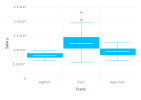

  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edel

In [21]:
plot(SalariesFrame, x="Rank", y="Salary", Geom.boxplot)

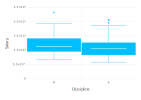

In [22]:
plot(SalariesFrame, x="Discipline", y="Salary", Geom.boxplot)

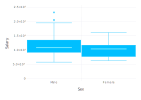

In [23]:
plot(SalariesFrame, x="Sex", y="Salary", Geom.boxplot)

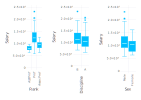

  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edel

In [24]:
hstack(
  plot(SalariesFrame, x="Rank", y="Salary", Geom.boxplot),
  plot(SalariesFrame, x="Discipline", y="Salary", Geom.boxplot),
  plot(SalariesFrame, x="Sex", y="Salary", Geom.boxplot)
)

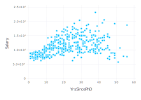

In [25]:
plot(SalariesFrame, x="YrsSincePhD", y="Salary")

  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
in render at /Users/edelman/.julia/v0.6/Gadfly/src/geom/point.jl


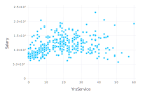

In [26]:
plot(SalariesFrame, x="YrsService", y="Salary")

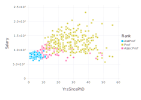

  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /Users/edelman/.julia/v0.6/IJulia/src/kernel.jl:31


In [27]:
plot(SalariesFrame, x="YrsSincePhD", y="Salary", color="Rank")

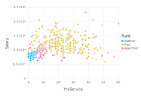

In [28]:
plot(SalariesFrame, x="YrsService", y="Salary", color="Rank")

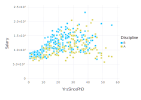

In [29]:
plot(SalariesFrame, x="YrsSincePhD", y="Salary", color="Discipline")

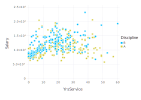

In [30]:
plot(SalariesFrame, x="YrsService", y="Salary", color="Discipline")

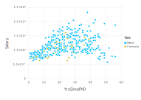

In [31]:
plot(SalariesFrame, x="YrsSincePhD", y="Salary", color="Sex")

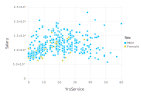

In [32]:
plot(SalariesFrame, x="YrsService", y="Salary", color="Sex")

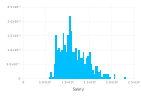

In [33]:
plot(SalariesFrame, x="Salary", Geom.histogram(bincount=50, density=true))

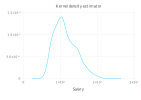

In [34]:
salaries = kde(SalariesFrame[:Salary])

plot(
  x=salaries.x,
  y=salaries.density,
  Geom.line,
  Guide.xlabel("Salary"),
  Guide.ylabel(""),
  Guide.title("Kernel density estimator")
)

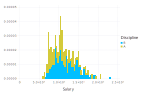

In [35]:
plot(SalariesFrame, x="Salary", color="Discipline", Geom.histogram(bincount=50, density=true))

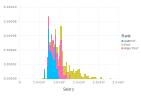

In [36]:
plot(SalariesFrame, x="Salary", color="Rank", Geom.histogram(bincount=50, density=true))

In [37]:
kdes = [kde(@where(SalariesFrame, :Rank .== l)[:Salary]) for l in levels(SalariesFrame[:Rank])]

3-element Array{KernelDensity.UnivariateKDE{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}},1}:
 KernelDensity.UnivariateKDE{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}(50408.05568132376:28.976985167245957:109723.94431867624, [1.50549e-9, 1.51391e-9, 1.52429e-9, 1.53664e-9, 1.55097e-9, 1.5673e-9, 1.58564e-9, 1.60602e-9, 1.62846e-9, 1.65297e-9  …  1.52792e-9, 1.51695e-9, 1.50794e-9, 1.50086e-9, 1.49573e-9, 1.49252e-9, 1.49125e-9, 1.4919e-9, 1.49449e-9, 1.49902e-9])                   
 KernelDensity.UnivariateKDE{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}(41209.85063743251:52.22046835619687:148105.1493625675, [7.6062e-10, 7.61678e-10, 7.63804e-10, 7.67e-10, 7.71268e-10, 7.76614e-10, 7.83042e-10, 7.9056e-10, 7.99175e-10, 8.08895e-10  …  8.09048e-10, 7.99311e-10, 7.9068e-10, 7.83146e-10, 7.76702e-10, 7.7134e-10, 7.67055e-10, 7.63844e-10, 7.61702e-10, 7.60628e-10])      
 KernelDensit

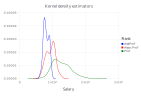

In [38]:
plot(
layer(x=kdes[1].x, y=kdes[1].density, Geom.line, Theme(default_color=colorant"blue")),
layer(x=kdes[2].x, y=kdes[2].density, Geom.line, Theme(default_color=colorant"red")),
layer(x=kdes[3].x, y=kdes[3].density, Geom.line, Theme(default_color=colorant"green")),
Guide.manual_color_key("Rank", ["AsstProf", "AssocProf", "Prof"], ["blue", "red", "green"]),
Guide.xlabel("Salary"), Guide.ylabel(""), Guide.title("Kernel density estimators")
)

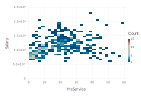

In [39]:
plot(SalariesFrame, x="YrsService", y="Salary", Geom.histogram2d(xbincount=30, ybincount=30))